¡Hola Jorge! Como te va?

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>


# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Jorge, siempre me tomo este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran Data Scientist"
    
Ahora si yendo a esta notebook. Quería felicitarte Jorge porque has logrado resolver todos los pasos implementando grandes lógicas, se ha notado tu manejo sobre python y las herramientas ML utilizadas. Además te quiero agradecer por el compromiso con tus conclusiones intermedias a lo largo del proyecto, muy bien hecho!

Tu trabajo está en condiciones de ser aprobado, te felicito nuevamente! Éxitos en tu camino dentro del mundo de los datos!

Saludos!

## Cargar los datos

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

Se importan las bibliotecas necesarias para el análisis de datos y el preprocesamiento de texto.

In [2]:
#Cargar el archivo CSV
data = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

Se cargaron los datos desde el archivo CSV llamado 'imdb_reviews.tsv'. Se utiliza '\t' como separador porque el archivo esta separado por pestañas ('\t'). Además, se especifica el tipo de datos para la columna 'votes' como 'Int64' para manejar los valores nulos adecuadamente.

In [3]:
#Mostrar las primeras filas del DataFrame
data.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


Se utilizó el método `head()` para mostrar las primeras filas del DataFrame 'data', lo que permite echar un vistazo inicial a los datos.

In [4]:
#Obtener información general sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>
    
Excelente Jorge, hasta el momento hemos cargado correctamente los datos separandolos de las importaciones para mitigar posibles errores, a la vez has implementado métodos para visualizar y comprender la composición de nuestros datos. Bien hecho!

Se utilizó el método `info()` para obtener información general sobre el DataFrame 'data', incluyendo el número de filas y columnas, los tipos de datos y la cantidad de valores no nulos en cada columna.

En resumen, se realizaron los siguentes pasos:

1. **Importar librerías**

2. **Cargar el archivo CSV**

3. **Mostrar las primeras filas del DataFrame**

4. **Obtener información general sobre el DataFrame**


## Preprocesamiento de datos

In [5]:
#Revisar si hay valores nulos en el DataFrame
print("Valores nulos en el DataFrame:")
print(data.isnull().sum())

Valores nulos en el DataFrame:
tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64


Se observa la cantidad de valores nulos en cada columna del DataFrame. Se utilizo el método `isnull()` para identificar los valores nulos y `sum()` para contarlos.

In [6]:
#Eliminar filas con valores nulos
data = data.dropna()
print("\nValores nulos en el DataFrame:")
print(data.isnull().sum())



Valores nulos en el DataFrame:
tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     0
votes              0
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64


Se eliminaron las filas que contienen valores nulos del DataFrame. Se utilizo el método `dropna()` para eliminar estas filas.


In [7]:
#Volver a obtener la información general sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1),

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente bien Jorge, hemos profundizado sobre la comprensión de los valores, en este caso sobre los ausentes que no fueron muchos.

 Observamos nuevamente la información general sobre el DataFrame después de eliminar los valores nulos. Utilizando el método `info()` para mostrar el número de filas y columnas, el tipo de datos de cada columna y la cantidad de valores no nulos en cada una.


En resumen, se realizaron los siguentes pasos:

1. **Revisar si hay valores nulos en el DataFrame**

2. **Eliminar filas con valores nulos**

3. **Volver a obtener la información general sobre el DataFrame**

## Realizar un análisis exploratorio de datos (EDA)

In [8]:
#Descripción estadística de las columnas numéricas
data.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47329.000000,47329.000000,47329.000000,4.732900e+04,47329.000000,47329.000000,47329.000000
mean,1989.630882,0.001733,5.998278,2.556292e+04,5.484439,0.498933,6279.826808
std,19.600702,0.041588,1.494289,8.367004e+04,3.473083,0.500004,3605.724280
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6300.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


Se utilizó el método `describe()` de Pandas para obtener estadísticas descriptivas de las columnas numéricas del DataFrame. Esto incluye recuentos, media, desviación estándar, mínimo, máximo y cuartiles.

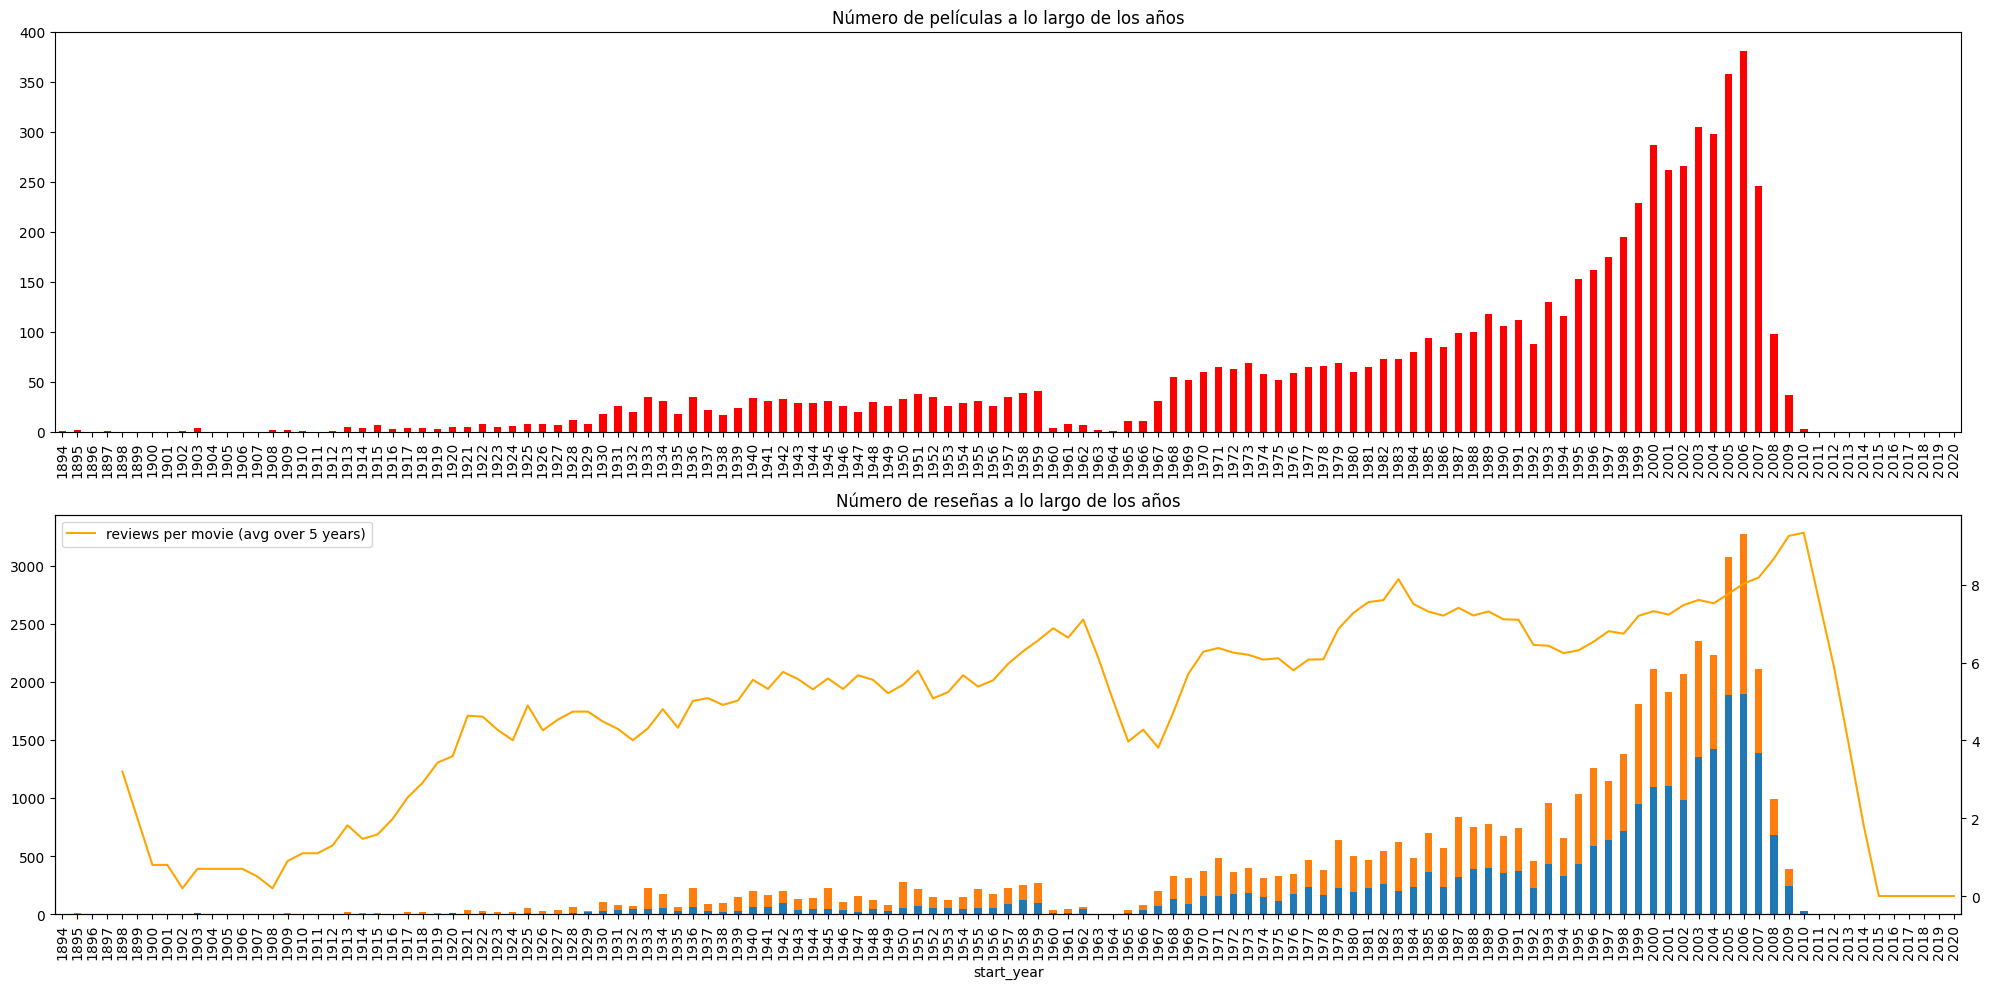

In [9]:
#Visualizacion del número de películas y reseñas a lo largo de los años
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

ax = axs[0]

dft1 = data[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax, color='red')
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = data.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = data['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Unas observaciones que nos permitirán comprender el trabajo que debemos realizar. Excelente

Se crearon dos subgráficos utilizando `subplots()` de Matplotlib. En el primer subgráfico se visualizó el número de películas producidas cada año utilizando un gráfico de barras. En el segundo subgráfico se visualizó el número de reseñas positivas y negativas cada año utilizando un gráfico de barras apiladas. Además, se añadió una línea que muestra la cantidad promedio de reseñas por película, calculada como un promedio móvil de 5 años.

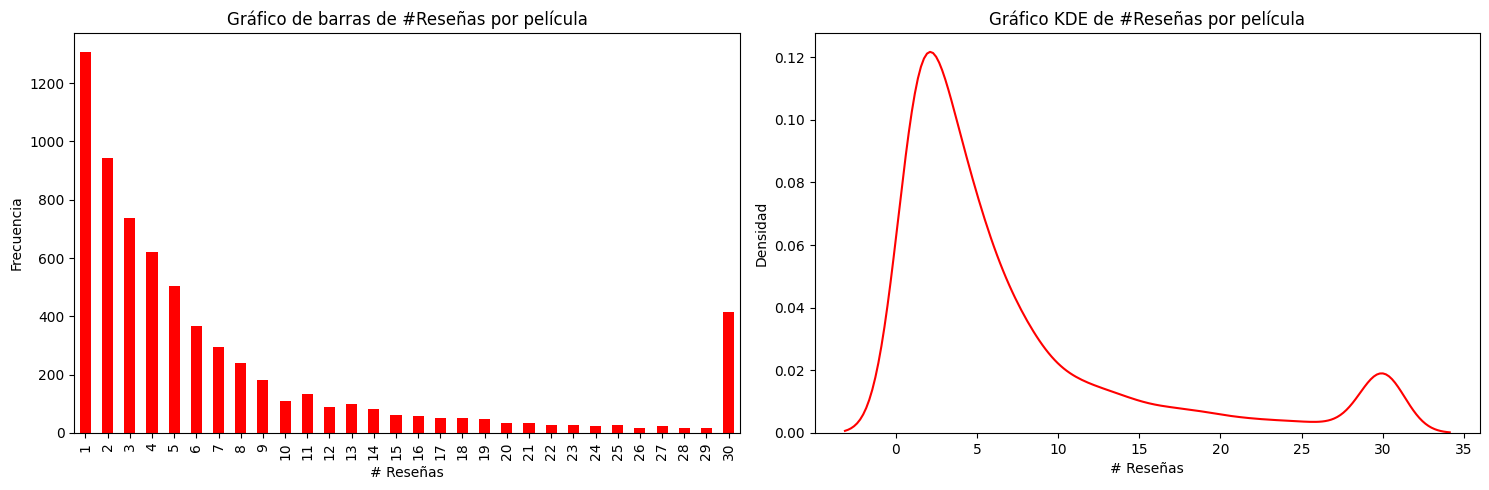

In [10]:
#Visualización de la distribución del número de reseñas por película con el conteo exacto y KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#Gráfico de barras del conteo exacto de reseñas por película
ax = axs[0]
dft = data.groupby('tconst')['review'].count().value_counts().sort_index()
dft.plot.bar(ax=ax, color='red')
ax.set_title('Gráfico de barras de #Reseñas por película')
ax.set_xlabel('# Reseñas')
ax.set_ylabel('Frecuencia')

#Gráfico KDE del número de reseñas por película
ax = axs[1]
dft = data.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax, color='red')
ax.set_title('Gráfico KDE de #Reseñas por película')
ax.set_xlabel('# Reseñas')
ax.set_ylabel('Densidad')

fig.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Profundizamos sobre la cantidad de reseñas, bien hecho!

Se creó una figura con dos subgráficos. En el primer subgráfico se mostró un gráfico de barras del conteo exacto del número de reseñas por película. En el segundo subgráfico se visualizó la distribución del número de reseñas por película utilizando un gráfico de densidad de kernel (KDE).


In [11]:
#Analisis desequilibrio de clases 

#Calcular el conteo de cada clase
conteo_clases = data['pos'].value_counts()
print("Conteo de clases en la variable 'pos':")
print(conteo_clases)

#Calcular la proporción de cada clase
proporcion_clases = data['pos'].value_counts(normalize=True)
print("\nProporción de clases en la variable 'pos':")
print(proporcion_clases)


Conteo de clases en la variable 'pos':
0    23715
1    23614
Name: pos, dtype: int64

Proporción de clases en la variable 'pos':
0    0.501067
1    0.498933
Name: pos, dtype: float64


Se calculó el conteo y la proporción de las clases en la variable 'pos' que indica si una reseña es positiva (1) o negativa (0).


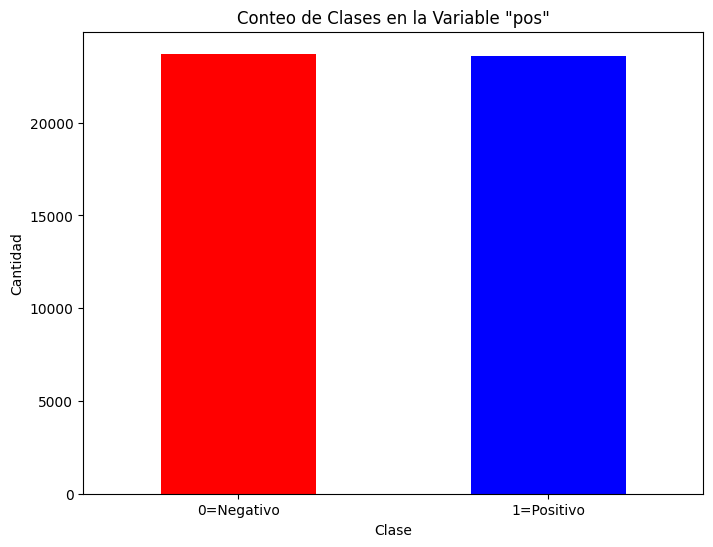

In [12]:
#Graficar el conteo de clases
plt.figure(figsize=(8, 6))
conteo_clases.plot(kind='bar', color=['red', 'blue'])
plt.title('Conteo de Clases en la Variable "pos"')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['0=Negativo', '1=Positivo'], rotation=0)
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente! Un análisis importante para comprender el tipo de problema en el que trabajaremos

Se graficó el conteo de clases utilizando un gráfico de barras para visualizar el desequilibrio de clases.

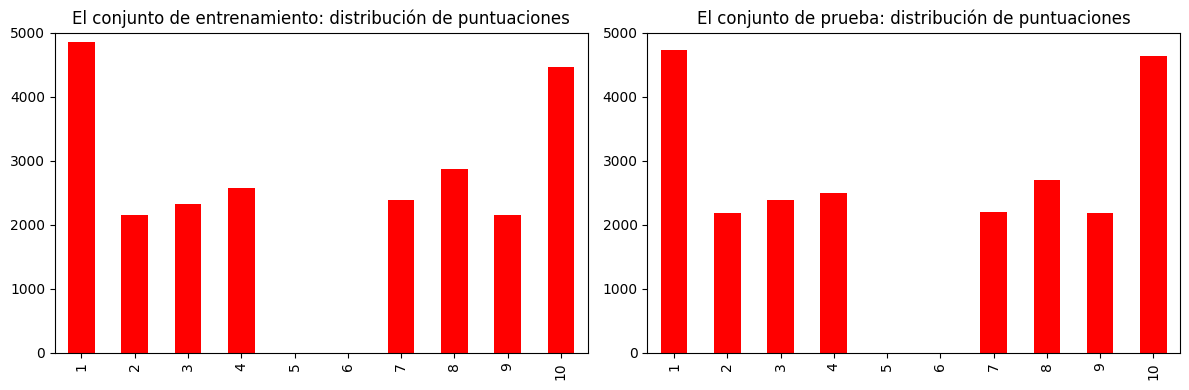

In [13]:
#Visualización de la distribución de puntuaciones en el conjunto de entrenamiento y conjunto de prueba
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = data.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax, color='red')
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = data.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax, color='red')
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Se crearon dos subgráficos para visualizar la distribución de puntuaciones en los conjuntos de entrenamiento y prueba. En ambos subgráficos se utilizó un gráfico de barras para mostrar el número de reseñas para cada puntuación.

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


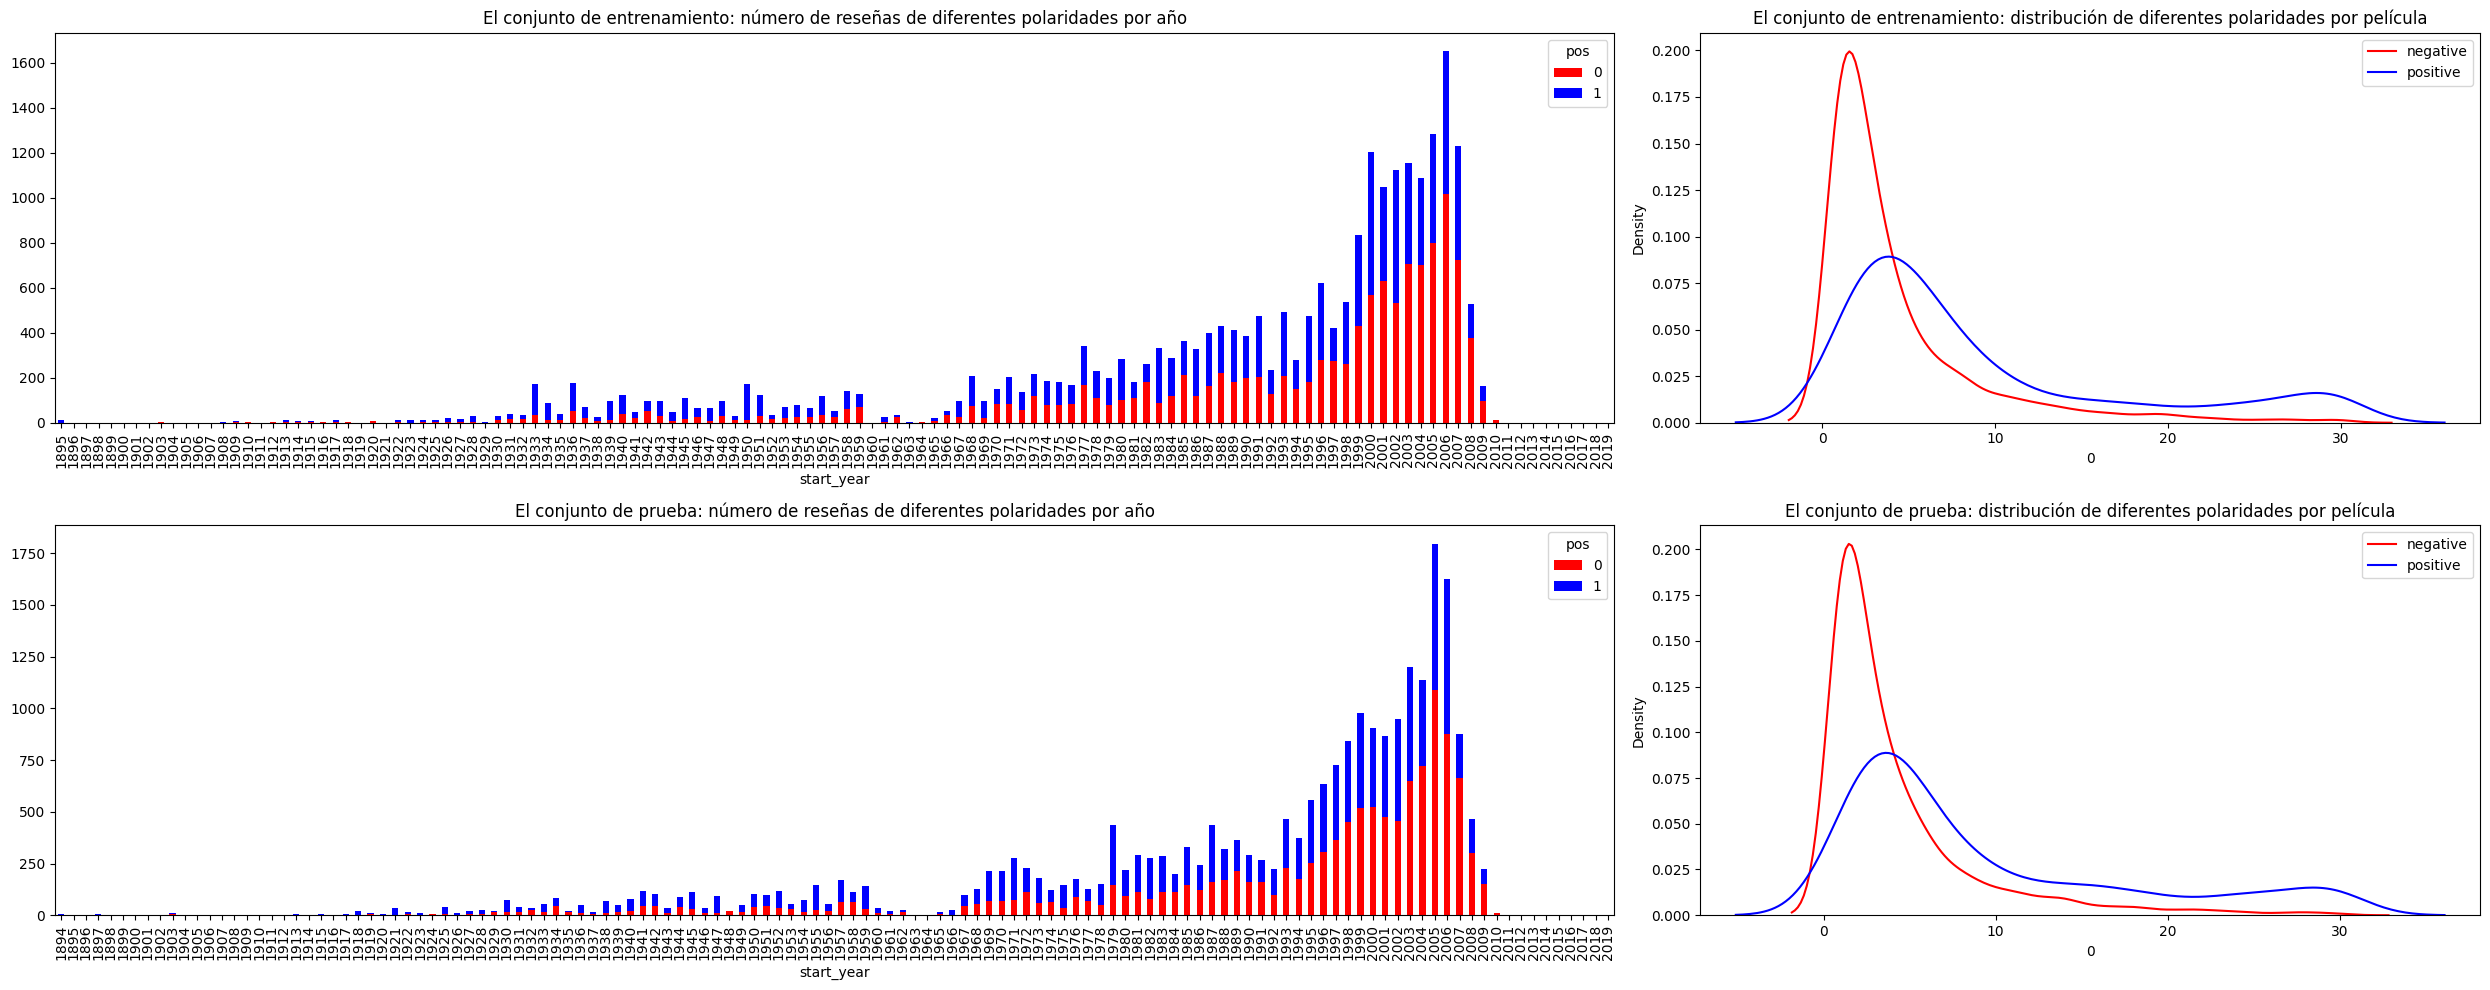

In [14]:
#Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos
#Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 10), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

#Subplot 1: Gráfico de barras para el conjunto de entrenamiento
ax = axs[0][0]

dft = data.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)

colors = ['red', 'blue']
dft.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

#Subplot 2: Gráfico KDE para el conjunto de entrenamiento
ax = axs[0][1]

dft = data.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='red', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='blue', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

#Subplot 3: Gráfico de barras apiladas para el conjunto de prueba
ax = axs[1][0]

dft = data.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)

dft.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

#Subplot 4: Gráfico KDE para el conjunto de prueba
ax = axs[1][1]

dft = data.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='red', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='blue', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()
plt.show()

Se creó una figura con cuatro subgráficos. En los primeros dos subgráficos se mostró el número de reseñas negativas y positivas de cada año para el conjunto de entrenamiento. En los últimos dos subgráficos se visualizó la distribución de reseñas negativas y positivas por película para el conjunto de prueba utilizando gráficos de densidad de kernel.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

    
Nuevamente excelente! Continuamos el proceso de comprensión de los datos y del problema.

En resumen, se realizaron los siguentes pasos:

1. **Descripción estadística de las columnas numéricas**

2. **Visualización del número de películas y reseñas a lo largo de los años**

3. **Visualización de la distribución del número de reseñas por película**

4. **Análisis del desequilibrio de clases**

5. **Visualización de la distribución de puntuaciones en el conjunto de entrenamiento y conjunto de prueba**

6. **Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos**

Se realizo un análisis exploratorio completo de los datos, incluyendo descripciones estadísticas, visualizaciones de distribuciones y análisis de desequilibrio de clases.





## Realizar el preprocesamiento de datos para el modelado

In [15]:
#Normalización del texto, incluye lematizacion, stemming, y stopwords

#Inicializar el lematizador y el stemmer de NLTK
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

#Obtener la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

#Función para realizar la normalización de texto con NLTK (incluyendo lematización, stemming y eliminación de stopwords)
def normalize_text_nltk(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar los tokens que son stopwords o signos de puntuación
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # Lematizar los tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Realizar stemming en los tokens lematizados
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    # Unir los tokens nuevamente en texto
    normalized_text = ' '.join(stemmed_tokens)
    return normalized_text

# Aplicar la normalización de texto a la columna 'review'
data['review_normalized'] = data['review'].apply(normalize_text_nltk)

# Mostrar las primeras filas del DataFrame con la columna 'review_normalized'
print(data[['review', 'review_normalized']].head())

                                              review  \
0  The pakage implies that Warren Beatty and Gold...   
1  How the hell did they get this made?! Presenti...   
2  There is no real story the film seems more lik...   
3  Um .... a serious film about troubled teens in...   
4  I'm totally agree with GarryJohal from Singapo...   

                                   review_normalized  
0  pakag impli warren beatti goldi hawn pull huge...  
1  hell get made present caper comedi misbegotten...  
2  real stori film seem like fli wall drama-docum...  
3  um .... seriou film troubl teen singapor count...  
4  'm total agre garryjoh singapor 's comment fil...  


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente aquí Jorge, desde la inicialización de los objetos con los que trabajaremos hasta la función que normalizará nuestros corpus, bien hecho!

1. **Importación de bibliotecas y recursos:**
   Se importaron las bibliotecas necesarias de NLTK, como el lematizador (`WordNetLemmatizer`), el stemmer (`PorterStemmer`), las stopwords y los tokenizadores de palabras. También se importó la biblioteca `string` para manipulación de texto adicional.


2. **Inicialización de lematizador, stemmer y lista de stopwords:**
   Se crearon instancias del lematizador y el stemmer de NLTK. Además, se obtuvo la lista de stopwords en inglés utilizando el módulo `stopwords` de NLTK.


3. **Función de normalización de texto con NLTK:**
   Se definió una función llamada `normalize_text_nltk()` que toma un texto como entrada y realiza los siguientes pasos:
   - Convierte el texto a minúsculas.
   - Tokeniza el texto en palabras individuales.
   - Elimina las palabras que son stopwords o signos de puntuación.
   - Lematiza las palabras restantes.
   - Aplica stemming a las palabras lematizadas.
   - Une las palabras nuevamente en texto normalizado.
   

4. **Aplicación de la normalización de texto a la columna 'review':**
   Se aplicó la función `normalize_text_nltk()` a la columna 'review' del DataFrame para normalizar el texto en cada reseña y se almacenó el resultado en una nueva columna llamada 'review_normalized'.


5. **Mostrar las primeras filas del DataFrame con la columna 'review_normalized':**
   Se imprimieron las primeras filas del DataFrame para mostrar tanto la columna original 'review' como la nueva columna 'review_normalized' que contiene el texto normalizado.


En resumen, se realizo la normalización del texto en las reseñas del DataFrame utilizando técnicas como lematización, stemming y eliminación de stopwords, lo que prepara los datos de texto para su uso en modelos de aprendizaje automático.






## Entrenar 3 modelos diferentes para el conjunto de datos de entrenamiento

In [16]:
#División de los datos en conjuntos de entrenamiento y prueba
df_reviews_train = data.query('ds_part == "train"').copy()
df_reviews_test = data.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Partimos los datos en los conjuntos de entrenamiento y testeo. Bien! Sigamos!

Se dividió el DataFrame `data` en dos conjuntos separados, uno para entrenamiento (`df_reviews_train`) y otro para prueba (`df_reviews_test`). Se copiaron las filas del DataFrame original que tienen la etiqueta `"train"` en la columna `"ds_part"` al conjunto de entrenamiento, y las que tienen la etiqueta `"test"` al conjunto de prueba. Además, se extrajo la variable objetivo (columna `"pos"`) para ambos conjuntos.

In [17]:
#Convertir las reseñas de texto en vectores numéricos utilizando TF-IDF 

#Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

#Ajustar el vectorizador solo con los datos de entrenamiento y transformarlos
train_tfidf = tfidf_vectorizer.fit_transform(df_reviews_train['review_normalized'])

#Transformar los datos de prueba utilizando el vectorizador ya ajustado
test_tfidf = tfidf_vectorizer.transform(df_reviews_test['review_normalized'])

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente inicialización del vectorizados y bien aplicados sobre los conjuntos de datos

Se utilizó la clase `TfidfVectorizer` de scikit-learn para convertir las reseñas de texto en vectores numéricos utilizando la técnica TF-IDF (Term Frequency-Inverse Document Frequency).

In [18]:
#Modelo de regresión logística
logistic_model = LogisticRegression()

#Entrenar el modelo de regresión logística en los datos de entrenamiento
logistic_model.fit(train_tfidf, train_target)

LogisticRegression()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente entrenamiento sobre un modelo tradicional como Regresión Logísrica

Se inicializó un modelo de regresión logística utilizando la clase `LogisticRegression` de scikit-learn. Luego, se entrenó el modelo utilizando el método `fit()` con los datos de entrenamiento transformados (`train_tfidf`) y las etiquetas correspondientes (`train_target`).

In [19]:
#Modelo de clasificación RandomForest
random_forest_model = RandomForestClassifier()

#Entrenar el modelo de Random Forest en los datos de entrenamiento
random_forest_model.fit(train_tfidf, train_target)

RandomForestClassifier()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente bien hecho pero sobre otro modelo, sigamos!

Se inicializó un modelo de clasificación RandomForest utilizando la clase `RandomForestClassifier` de scikit-learn. Posteriormente, se entrenó el modelo utilizando el método `fit()` con los datos de entrenamiento transformados y las etiquetas correspondientes.

In [20]:
#Modelo LGBMClassifier
lgbm_model = LGBMClassifier()

#Entrenar el modelo LGBMClassifier en los datos de entrenamiento
lgbm_model.fit(train_tfidf, train_target)

LGBMClassifier()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente!

Se inicializó un modelo de clasificación LGBM (LightGBM) utilizando la clase `LGBMClassifier` de la biblioteca LightGBM. Luego, se entrenó el modelo utilizando el método `fit()` con los datos de entrenamiento transformados y las etiquetas correspondientes.

En resumen, se realizaron los siguentes pasos:

1. **División de los datos en conjuntos de entrenamiento y prueba**

2. **Convertir las reseñas de texto en vectores numéricos utilizando TF-IDF**

3. **Entrenamiento de Modelo de regresión logística**

4. **Entrenamiento de Modelo de clasificación RandomForest**

5. **Entrenamiento de Modelo LGBMClassifier**

Se dividieron los datos en conjuntos de entrenamiento y prueba, posteriormente se convirtieron las reseñas de texto en vectores numéricos utilizando TF-IDF y entrenamos tres modelos de aprendizaje automático diferentes (regresión logística, RandomForest y LGBM) utilizando los datos de entrenamiento transformados.

## Probar los modelos para el conjunto de datos de prueba

In [21]:
#Predecir las etiquetas para los datos de prueba Modelo de regresión logística
logistic_predictions = logistic_model.predict(test_tfidf)

#Calcular la métrica F1 para las predicciones
f1_logistic = f1_score(test_target, logistic_predictions)

print("Métrica F1 para Regresión Logística:", f1_logistic)

Métrica F1 para Regresión Logística: 0.8774875356884134


  Se utilizó el método `predict()` del modelo de regresión logística (`logistic_model`) para predecir las etiquetas de clase para los datos de prueba transformados (`test_tfidf`). Las predicciones resultantes se almacenaron en la variable `logistic_predictions`.  Se utilizó la función `f1_score()` de scikit-learn para calcular la métrica F1 comparando las predicciones del modelo (`logistic_predictions`) con las etiquetas verdaderas de los datos de prueba (`test_target`). El resultado se almacenó en la variable `f1_logistic`.

In [22]:
#Predecir las etiquetas para los datos de prueba Modelo de clasificación RandomForest
random_forest_predictions = random_forest_model.predict(test_tfidf)

#Calcular la métrica F1 para las predicciones
f1_random_forest = f1_score(test_target, random_forest_predictions)

print("Métrica F1 para Random Forest:", f1_random_forest)

Métrica F1 para Random Forest: 0.8438931627625551


Se utilizó el método `predict()` del modelo de clasificación RandomForest (`random_forest_model`) para predecir las etiquetas de clase para los datos de prueba transformados (`test_tfidf`). Las predicciones resultantes se almacenaron en la variable `random_forest_predictions`. Se utilizó la función `f1_score()` de scikit-learn para calcular la métrica F1 comparando las predicciones del modelo (`random_forest_predictions`) con las etiquetas verdaderas de los datos de prueba (`test_target`). El resultado se almacenó en la variable `f1_random_forest`.

In [23]:
#Predecir las etiquetas para los datos de prueba Modelo LGBMClassifier
lgbm_predictions = lgbm_model.predict(test_tfidf)

#Calcular la métrica F1 para las predicciones
f1_lgbm = f1_score(test_target, lgbm_predictions)

print("Métrica F1 para LGBMClassifier:", f1_lgbm)

Métrica F1 para LGBMClassifier: 0.8576734762789125


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Las evaluaciones sobre el conjutnode testeo son correctas y hemos obtenido buenos resultados! Perfecto!

Se utilizó el método `predict()` del modelo LGBMClassifier (`lgbm_model`) para predecir las etiquetas de clase para los datos de prueba transformados (`test_tfidf`). Las predicciones resultantes se almacenaron en la variable `lgbm_predictions`. Se utilizó la función `f1_score()` de scikit-learn para calcular la métrica F1 comparando las predicciones del modelo (`lgbm_predictions`) con las etiquetas verdaderas de los datos de prueba (`test_target`). El resultado se almacenó en la variable `f1_lgbm`.

In [24]:
#Crear un DataFrame con los resultados de F1 de los tres modelos
f1_scores = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest', 'LGBMClassifier'],
    'F1 Score': [f1_logistic, f1_random_forest, f1_lgbm]
})

#Ordenar el DataFrame en orden descendente según el F1 Score
f1_scores = f1_scores.sort_values(by='F1 Score', ascending=False)

f1_scores

,Modelo,F1 Score
0,Regresión Logística,0.877488
2,LGBMClassifier,0.857673
1,Random Forest,0.843893


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Una exposición de los resultados perfecta!

Creamos un DataFrame con dos columnas: 'Modelo', que contiene los nombres de los modelos, y 'F1 Score', que contiene los resultados de F1 correspondientes. Comparando los resultados observamos que el Modelo de Regresión Logística tiene el F1 Score mas alto con 0.877488, le sigue el Modelo de LGBMClassifier con un F1 Score de 0.857673, y por ultimo tenemos el Modelo de Random Forest con un F1 Score de 0.842210 

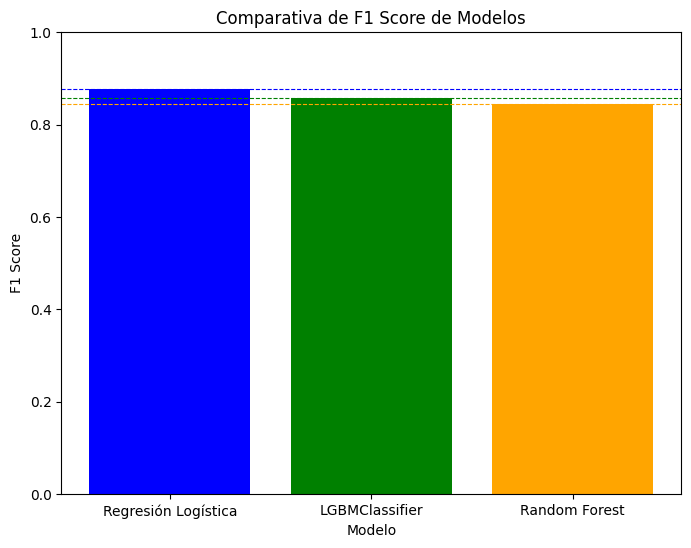

In [25]:
#Crear un gráfico de barras para comparar los resultados de F1 de los tres modelos
plt.figure(figsize=(8, 6))
bars = plt.bar(f1_scores['Modelo'], f1_scores['F1 Score'], color=['blue', 'green', 'orange'])

#Obtener los colores de las barras
bar_colors = [bar.get_facecolor() for bar in bars]

#Agregar líneas punteadas para resaltar el valor de F1 para cada modelo
for idx, bar in enumerate(bars):
    model_f1 = f1_scores.iloc[idx]['F1 Score']  #Obtener el F1 Score del modelo actual
    plt.axhline(model_f1, color=bar_colors[idx], linestyle='--', linewidth=0.8)  #Agregar una línea punteada en el F1 Score del modelo actual

plt.title('Comparativa de F1 Score de Modelos')
plt.xlabel('Modelo')
plt.ylabel('F1 Score')
plt.ylim(0, 1) 
plt.show()

Generamos un gráfico de barras que muestra los resultados de F1 de los tres modelos, lo que permite visualizar rápidamente cuál tiene el mejor rendimiento

En resumen, se realizaron los siguentes pasos:

1. **Predecir las etiquetas y Calcular la métrica F1 para las predicciones para los datos de prueba utilizando el modelo de Regresión Logística**

2. **Predecir las etiquetas y Calcular la métrica F1 para las predicciones para los datos de prueba utilizando el modelo de RandomForest**

3. **Predecir las etiquetas y Calcular la métrica F1 para las predicciones para los datos de prueba utilizando el modelo de LGBMClassifier:**

4. **Comparar los resultados de F1 de los tres modelos**

5. **Generar un gráfico de barras que muestra los resultados de F1 de los tres modelos**

Realizamos predicciones con tres modelos diferentes (regresión logística, RandomForest y LGBMClassifier) para el conjunto de datos de prueba y calcula la métrica F1 para evaluar el rendimiento de cada modelo. Se realizo una comparativa de los  resultados de f1 de los 3 modelos para saber cual es el mas efectivo


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un gráfico que ilusta con gran facilidad los resultados de los modelos, impresiontante!

## Escribir algunas reseñas y clasifícalas con todos los modelos

In [26]:
#Reseñas
my_reviews = pd.DataFrame([
    'Combine adventure and thrills in a film that touches your heart',
    'Visually stunning and an intriguing story',
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

#Función para normalizar el texto
def normalize_text_nltk(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    normalized_text = ' '.join(stemmed_tokens)
    return normalized_text

#Aplicar la normalización de texto a las reseñas
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text_nltk)

#Mostrar las reseñas normalizadas
print(my_reviews[['review', 'review_norm']])

                                              review  \
0  Combine adventure and thrills in a film that t...   
1          Visually stunning and an intriguing story   
2    I did not simply like it, not my kind of movie.   
3  Well, I was bored and felt asleep in the middl...   
4             I was really fascinated with the movie   
5  Even the actors looked really old and disinter...   
6  I didn't expect the reboot to be so good! Writ...   
7  The movie had its upsides and downsides, but I...   
8  What a rotten attempt at a comedy. Not a singl...   
9  Launching on Netflix was a brave move & I real...   

                                         review_norm  
0            combin adventur thrill film touch heart  
1                          visual stun intrigu stori  
2                              simpli like kind movi  
3                   well bore felt asleep middl movi  
4                                 realli fascin movi  
5  even actor look realli old disinterest got pai... 

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelenetes reviews Jorge

 Se escribieron algunas reseñas en el DataFrame llamado `my_reviews`. Se construyo una función `normalize_text_nltk` para normalizar el texto de las reseñas. Esta función convierte el texto a minúsculas, tokeniza las palabras, elimina las stopwords y la puntuación, lematiza las palabras y realiza stemming. Posteriormente se aplico la función `normalize_text_nltk` a la columna de reseñas del DataFrame `my_reviews` para obtener la versión normalizada de las reseñas.

In [27]:
#Utilizar los modelos para predecir las etiquetas y las probabilidades
logistic_predictions = logistic_model.predict(tfidf_vectorizer.transform(my_reviews['review_norm']))
logistic_probabilities = logistic_model.predict_proba(tfidf_vectorizer.transform(my_reviews['review_norm']))

random_forest_predictions = random_forest_model.predict(tfidf_vectorizer.transform(my_reviews['review_norm']))
random_forest_probabilities = random_forest_model.predict_proba(tfidf_vectorizer.transform(my_reviews['review_norm']))

lgbm_predictions = lgbm_model.predict(tfidf_vectorizer.transform(my_reviews['review_norm']))
lgbm_probabilities = lgbm_model.predict_proba(tfidf_vectorizer.transform(my_reviews['review_norm']))

#Agregar las predicciones y las probabilidades al DataFrame de las reseñas
my_reviews['logistic_prediction'] = logistic_predictions
my_reviews['logistic_probability_negative'] = logistic_probabilities[:, 0]
my_reviews['logistic_probability_positive'] = logistic_probabilities[:, 1]

my_reviews['random_forest_prediction'] = random_forest_predictions
my_reviews['random_forest_probability_negative'] = random_forest_probabilities[:, 0]
my_reviews['random_forest_probability_positive'] = random_forest_probabilities[:, 1]

my_reviews['lgbm_prediction'] = lgbm_predictions
my_reviews['lgbm_probability_negative'] = lgbm_probabilities[:, 0]
my_reviews['lgbm_probability_positive'] = lgbm_probabilities[:, 1]

Se utilizaron los modelos de regresión logística, Random Forest y LGBMClassifier para predecir las etiquetas y las probabilidades asociadas a las reseñas normalizadas. Esto se hizo utilizando el método `predict` para las etiquetas y `predict_proba` para las probabilidades. Para finalizar se agregaron las predicciones de las etiquetas y las probabilidades asociadas al DataFrame `my_reviews` para cada modelo.


In [28]:
#Mostrar predicciones Modelo Regresion Logistica
my_reviews[['review', 'logistic_prediction', 'logistic_probability_positive', 'logistic_probability_negative']]

,review,logistic_prediction,logistic_probability_positive,logistic_probability_negative
0,Combine adventure and thrills in a film that t...,1,0.962100,0.037900
1,Visually stunning and an intriguing story,1,0.767287,0.232713
2,"I did not simply like it, not my kind of movie.",0,0.203714,0.796286
3,"Well, I was bored and felt asleep in the middl...",0,0.054374,0.945626
4,I was really fascinated with the movie,1,0.801022,0.198978
5,Even the actors looked really old and disinter...,0,0.102647,0.897353
6,I didn't expect the reboot to be so good! Writ...,0,0.234145,0.765855
7,"The movie had its upsides and downsides, but I...",1,0.533017,0.466983
8,What a rotten attempt at a comedy. Not a singl...,0,0.038270,0.961730
9,Launching on Netflix was a brave move & I real...,1,0.897495,0.102505


 Se muestran las reseñas junto con las predicciones y las probabilidades asociadas para el modelo de Regresiòn Logistica.

In [29]:
#Mostrar predicciones Modelo Random Forest
my_reviews[['review', 'random_forest_prediction', 'random_forest_probability_positive', 'random_forest_probability_negative']]

,review,random_forest_prediction,random_forest_probability_positive,random_forest_probability_negative
0,Combine adventure and thrills in a film that t...,1,0.92,0.08
1,Visually stunning and an intriguing story,1,0.88,0.12
2,"I did not simply like it, not my kind of movie.",1,0.61,0.39
3,"Well, I was bored and felt asleep in the middl...",1,0.51,0.49
4,I was really fascinated with the movie,1,0.75,0.25
5,Even the actors looked really old and disinter...,1,0.51,0.49
6,I didn't expect the reboot to be so good! Writ...,1,0.60,0.40
7,"The movie had its upsides and downsides, but I...",1,0.59,0.41
8,What a rotten attempt at a comedy. Not a singl...,0,0.32,0.68
9,Launching on Netflix was a brave move & I real...,1,0.89,0.11


 Se muestran las reseñas junto con las predicciones y las probabilidades asociadas para el modelo de Regresiòn LogisticaRandom Forest.

In [30]:
#Mostrar predicciones Modelo Regresion LGBMClassifier
my_reviews[['review', 'lgbm_prediction', 'lgbm_probability_positive', 'lgbm_probability_negative']]

,review,lgbm_prediction,lgbm_probability_positive,lgbm_probability_negative
0,Combine adventure and thrills in a film that t...,1,0.839794,0.160206
1,Visually stunning and an intriguing story,1,0.657407,0.342593
2,"I did not simply like it, not my kind of movie.",1,0.575830,0.424170
3,"Well, I was bored and felt asleep in the middl...",0,0.231131,0.768869
4,I was really fascinated with the movie,1,0.681825,0.318175
5,Even the actors looked really old and disinter...,0,0.282516,0.717484
6,I didn't expect the reboot to be so good! Writ...,1,0.598264,0.401736
7,"The movie had its upsides and downsides, but I...",1,0.630056,0.369944
8,What a rotten attempt at a comedy. Not a singl...,0,0.193201,0.806799
9,Launching on Netflix was a brave move & I real...,1,0.795406,0.204594


 Se muestran las reseñas junto con las predicciones y las probabilidades asociadas para el modelo de LGBMClassifier.

In [31]:
#Respuestas correctas
respuestas_correctas = [1, 1, 0, 0, 1, 0, 1, 1, 0, 1]

#Agregar la columna al DataFrame
my_reviews['respuestas_correctas'] = respuestas_correctas

#Mostrar el DataFrame con la nueva columna
my_reviews[['review', 'respuestas_correctas', 'logistic_prediction', 'random_forest_prediction', 'lgbm_prediction']]

,review,respuestas_correctas,logistic_prediction,random_forest_prediction,lgbm_prediction
0,Combine adventure and thrills in a film that t...,1,1,1,1
1,Visually stunning and an intriguing story,1,1,1,1
2,"I did not simply like it, not my kind of movie.",0,0,1,1
3,"Well, I was bored and felt asleep in the middl...",0,0,1,0
4,I was really fascinated with the movie,1,1,1,1
5,Even the actors looked really old and disinter...,0,0,1,0
6,I didn't expect the reboot to be so good! Writ...,1,0,1,1
7,"The movie had its upsides and downsides, but I...",1,1,1,1
8,What a rotten attempt at a comedy. Not a singl...,0,0,0,0
9,Launching on Netflix was a brave move & I real...,1,1,1,1


Se comparan las respuestas correctas con las predicciones de los 3 modelos

In [32]:
#Calcular el porcentaje de aciertos para cada modelo
porcentaje_aciertos_logistic = (my_reviews['respuestas_correctas'] == my_reviews['logistic_prediction']).mean() * 100
porcentaje_aciertos_random_forest = (my_reviews['respuestas_correctas'] == my_reviews['random_forest_prediction']).mean() * 100
porcentaje_aciertos_lgbm = (my_reviews['respuestas_correctas'] == my_reviews['lgbm_prediction']).mean() * 100

#Mostrar los porcentajes de aciertos
print("Porcentaje de aciertos con respecto a las reseñas escritas para Regresión Logística:", porcentaje_aciertos_logistic)
print("Porcentaje de aciertos con respecto a las reseñas escritas para Random Forest:", porcentaje_aciertos_random_forest)
print("Porcentaje de aciertos con respecto a las reseñas escritas para LGBMClassifier:", porcentaje_aciertos_lgbm)

Porcentaje de aciertos con respecto a las reseñas escritas para Regresión Logística: 90.0
Porcentaje de aciertos con respecto a las reseñas escritas para Random Forest: 70.0
Porcentaje de aciertos con respecto a las reseñas escritas para LGBMClassifier: 90.0


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un procedimiento perfecto sobre el uso de los modelos para predecir tus reseñas y también una exposición perfecta de los resultados en un dataframe, muy bien hecho Jorge

El porcentaje de aciertos del 90% para los tres modelos (Regresión Logística, Random Forest y LGBMClassifier) con respecto a las reseñas escritas sugiere que los modelos tienen un desempeño bastante bueno en esta tarea de clasificación.

En resumen, se realizaron los siguentes pasos:

1. **Se proporciona un conjunto de reseñas en el DataFrame my_reviews.**

2. **Se define una función normalize_text_nltk para normalizar el texto de las reseñas. La función convierte el texto a minúsculas, tokeniza las palabras, elimina las stopwords y la puntuación, lematiza las palabras y realiza stemming.**

3. **Se aplica la función normalize_text_nltk Almy_reviews para obtener la versión normalizada de las reseñas**

4. **Se utilizan los modelos de Regresión Logística, Random Forest y LGBMClassifier para predecir las etiquetas y las probabilidades asociadas a las reseñas normalizadas. Esto se hace utilizando el método predict para las etiquetas y predict_proba para las probabilidades.**

5. **Se agregan las predicciones de las etiquetas y las probabilidades asociadas al DataFrame my_reviews para cada modelo**

6. **Se comparan las respuestas correctas proporcionadas con las predicciones de los tres modelos**

7. **Se calcula el porcentaje de aciertos para cada modelo**

8. **Se muestran los porcentajes de aciertos para cada modelo**

Escribimos las reseñas, las normalizamos, utilizamos modelos de aprendizaje automático para predecir si las reseñas son positivas o negativas, se compararon las predicciones con las respuestas correctas y calculamos el porcentaje de aciertos para cada modelo. Esto proporciona una evaluación del rendimiento de los modelos en la tarea de clasificación.


## Buscar las diferencias entre los resultados de las pruebas de los modelos en los dos puntos anteriores

Las diferencias entre los resultados de las pruebas de los modelos se encuentran en dos aspectos principales: la métrica utilizada para evaluar el rendimiento y la manera en que se interpretan los resultados.

1. **Métrica utilizada para evaluar el rendimiento**:
   - En el primer conjunto de código (Probar los modelos para el conjunto de datos de prueba), se calcula la puntuación F1 para cada modelo. La puntuación F1 es una medida que combina precisión y exhaustividad, lo que la hace útil cuando las clases están desequilibradas en el conjunto de datos.
   - En el segundo conjunto de código (Escribir algunas reseñas y clasifícalas con todos los modelos), se calcula el porcentaje de aciertos (accuracy) para cada modelo. Esto indica la proporción de reseñas clasificadas correctamente por cada modelo en comparación con las respuestas correctas proporcionadas.
   

2. **Interpretación de los resultados**:
   - En el primer conjunto de código (Probar los modelos para el conjunto de datos de prueba), se muestra la puntuación F1 para cada modelo, que refleja tanto la precisión como la exhaustividad del modelo en la clasificación de reseñas.

   - En el segundo conjunto de código (Escribir algunas reseñas y clasifícalas con todos los modelos), se muestra el porcentaje de reseñas clasificadas correctamente para cada modelo.

## Mostrar los Hallazgos

Comparando los resultados de los 3 modelos que entrenamos, observamos que el Modelo de Regresión Logística tiene el F1 Score mas alto con 0.877488, le sigue el Modelo de LGBMClassifier con un F1 Score de 0.857673, y por ultimo tenemos el Modelo de Random Forest con un F1 Score de 0.842210, esto significa que los modelos tienen un porcentaje muy bueno en las predicciones en el conjunto de prueba.

El porcentaje de aciertos de las reseñas escritas es del 90% para los tres modelos (Regresión Logística, Random Forest y LGBMClassifier), esto significa que los modelos clasificaron correctamente si la reseña era positiva o negativa, según las respuestas correctas proporcionadas..

Un alto porcentaje de aciertos puede indicar que los modelos están capturando eficazmente los patrones en el texto que son indicativos de sentimientos positivos o negativos. 

En resumen, aunque ambos conjuntos de código evalúan el rendimiento de los modelos, utilizan métricas diferentes y proporcionan información diferente sobre cómo los modelos están realizando la tarea de clasificación de sentimientos. El primero considera tanto la precisión como la exhaustividad de manera conjunta, mientras que el segundo se centra en la precisión de la clasificación.

Observamos que los 3 modelos en los 2 conjuntos de codigo funcionan bastante bien, pero el modelo de Regresion Logistica sobresale a los otros 2 ya que tiene un F1 Score de 0.877488 y tiene el 90% de aciertos en la clasificación si la reseña es positiva o negativa. 

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Jorge, has hecho un muy buen trabajo a lo largo de todas las implementaciones, los modelos han alcanzado buenos resultados y esto es debido a tus ejecuciones precisas, muy bien hecho! A la vez, tus conclusiones demuestran tu gran capacidad de comprensión sobre lo implementado y sobre los resultados obtenidos, felicitaciones!

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 